In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate Random Signals
np.random.seed(42)
n_samples = 1000
x = np.random.randn(n_samples)
d = np.random.randn(n_samples)

In [3]:
# Computation of statistical properties
E_d2 = np.mean(d**2)
E_dx = np.mean(d * x)
E_dx_shifted = np.mean(d[1:] * x[:-1])
E_x2 = np.mean(x**2)
E_xx_shifted = np.mean(x[1:] * x[:-1])

In [8]:
# Defining of error function
def compute_error(h0, h1):
    term1 = E_d2
    term2 = -2 * h0 * E_dx
    term3 = -2 * h1 * E_dx_shifted
    term4 = h0**2 * E_x2 + 2 * h0 * h1 * E_xx_shifted + h1**2 * E_x2
    return term1+ term2+ term3+ term4

In [21]:
# Vary Filter coeficients h0 and h1
h0_values = np.linspace(-1,1,100)
h1_values = np.linspace(-1,1,100)

In [22]:
H0, H1 = np.meshgrid(h0_values, h1_values)
Error = np.zeros_like(H0)


In [23]:
for i in range(H0.shape[0]):
    for j in range(H0.shape[1]):
        Error[i,j] = compute_error(H0[i,j], H1[i,j])

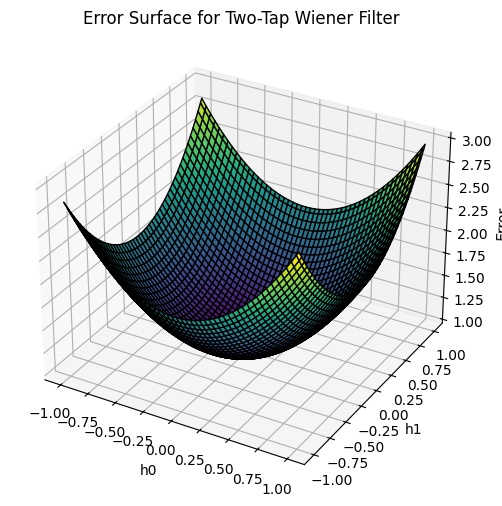

In [24]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(H0, H1, Error, cmap='viridis', edgecolor='k')
ax.set_title("Error Surface for Two-Tap Wiener Filter")
ax.set_xlabel("h0")
ax.set_ylabel("h1")
ax.set_zlabel("Error")
plt.show()